In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

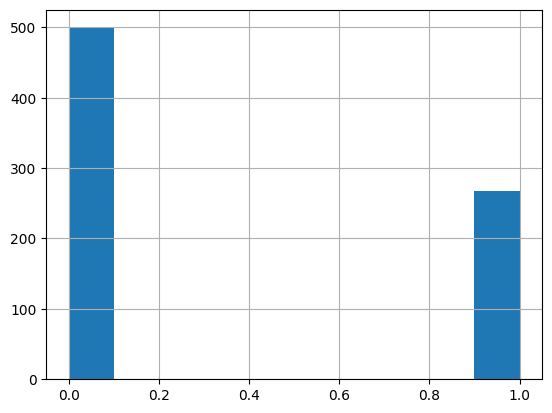

In [7]:
df['Outcome'].hist()

In [8]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [9]:
df.drop(columns=['SkinThickness', 'BloodPressure'], inplace=True)

In [10]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df = df.loc[(df['BMI'] < 50) | (df['Insulin'] < 100)]

In [12]:
df=df[df['Insulin'] < 500]

In [13]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,3.871693,120.235450,73.054233,31.813889,0.469128,33.234127,0.343915
std,3.376301,31.627972,98.918501,7.681789,0.325780,11.746075,0.475328
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.200000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,18.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,122.750000,36.400000,0.617250,41.000000,1.000000
max,17.000000,199.000000,495.000000,59.400000,2.420000,81.000000,1.000000


In [14]:
df=df[df['Pregnancies'] < 14]

In [15]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.812500,120.111702,72.900266,31.786037,0.469504,33.179521,0.340426
std,3.284666,31.596461,99.042497,7.690353,0.326054,11.750557,0.474168
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.175000,0.244000,24.000000,0.000000
50%,3.000000,116.000000,17.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,122.750000,36.300000,0.617250,40.250000,1.000000
max,13.000000,199.000000,495.000000,59.400000,2.420000,81.000000,1.000000


In [16]:
df=df[df['DiabetesPedigreeFunction'] < 1.7]

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

scaler = StandardScaler()

X = scaler.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=101)
for train_index, test_index in split.split(X, y):
    strat_train_set = X[train_index], y.iloc[train_index]
    strat_test_set = X[test_index], y.iloc[test_index]

X_train, y_train = strat_train_set
X_test, y_test = strat_test_set

In [18]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

import keras_tuner as kt

Using TensorFlow backend


In [19]:
def build_model(hp):
    model = Sequential()
    model.add(Input(6,))

    for i in range(hp.Int('num_layers', min_value=1, max_value=8)):
        model.add(
            Dense(
                hp.Int('units'+str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])
            )
        )
        model.add(BatchNormalization())
        model.add(Dropout(hp.Choice('droupout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [20]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='tuners',
    project_name='diabetes'
)

In [21]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.7410714030265808

Best val_accuracy So Far: 0.7589285969734192
Total elapsed time: 00h 00m 04s


In [22]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 48,
 'activation0': 'relu',
 'droupout0': 0.7,
 'optimizer': 'nadam',
 'units1': 24,
 'activation1': 'relu',
 'droupout1': 0.4,
 'units2': 56,
 'activation2': 'tanh',
 'droupout2': 0.4}

In [23]:
model = tuner.get_best_models(num_models=1)[0]

In [35]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [25]:
history = model.fit(X_train, y_train, epochs=200, initial_epoch=5, batch_size=64 ,validation_data=(X_test, y_test), callbacks=callback)

Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6788 - accuracy: 0.6533 - val_loss: 0.5793 - val_accuracy: 0.7545
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.6648 - val_loss: 0.5723 - val_accuracy: 0.7500
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6801 - val_loss: 0.5652 - val_accuracy: 0.7455
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.6341 - val_loss: 0.5588 - val_accuracy: 0.7411
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.6648 - val_loss: 0.5541 - val_accuracy: 0.7411
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7107 - val_loss: 0.5492 - val_accuracy: 0.7411
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.7031 - val_loss: 0.5455 - val_accuracy: 0.7411
Epoch 13/200
9/9 [======

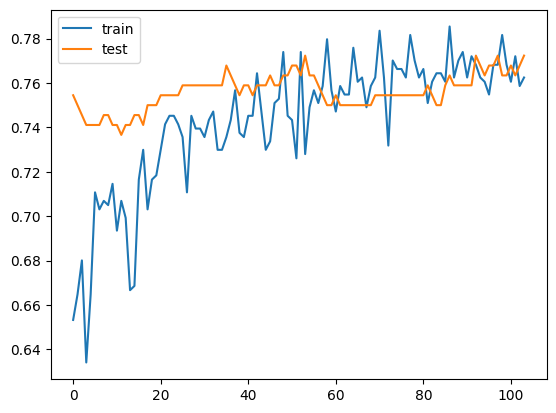

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

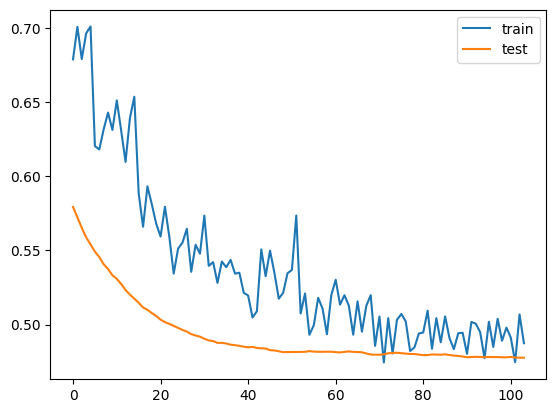

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [32]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 891us/step


In [33]:
# cut-off will be < 0.5 because it is more important for people how have diabetes to be diagnosed
predictions = np.where(predictions > 0.45, 1,0)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       148
           1       0.64      0.58      0.61        76

    accuracy                           0.75       224
   macro avg       0.72      0.71      0.71       224
weighted avg       0.74      0.75      0.74       224



Text(0.5, 1.0, 'Confusion Matrix')

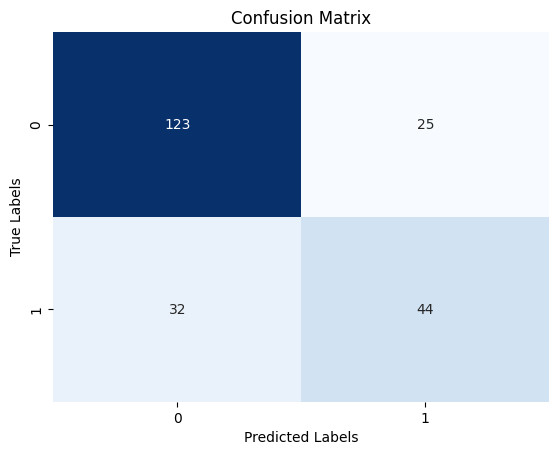

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [31]:
from joblib import dump, load
dump(model, 'model.joblib') 
dump(scaler, 'scaler.joblib') 

['scaler.joblib']